In [31]:
import matplotlib.pyplot as plt
import numpy as np
import tf_utils as utils

import tf_cnn as cnn
import cnn_utils
import tensorflow as tf

In [32]:
from PIL import Image
from os import listdir
import matplotlib.image as img

dog_img = []
cat_img = []
dog_add = '..\\dat\\cats_and_dogs\\training_set\\dogs'
cat_add = '..\\dat\\cats_and_dogs\\training_set\\cats'
add = [dog_add, cat_add]
max_count = 500
target_size = [256, 256]
for i in add:
    count = 1
    for filename in listdir(i):
        print(".", end="")
        image_data = img.imread(i + '\\' + filename)

        original_image = Image.fromarray(np.uint8(image_data))
        resized_image = original_image.resize(target_size)        
        resized_image = np.array(resized_image)

        if i == dog_add:
            dog_img.append(resized_image)
        else:
            cat_img.append(resized_image)

        count += 1
        if count > max_count:
            break

    print()

#creating labels for images
img_labels = [0]*len(dog_img) + [1]*len(cat_img)
all_img = dog_img + cat_img
labels = {0:"Dog" , 1:"Cat"}

....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

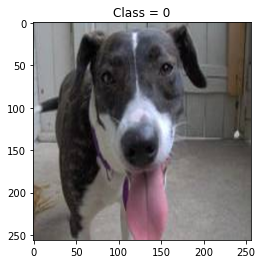

In [33]:
# show one of the images of class 0
index = 6
_, ax = plt.subplots()
ax.imshow(np.uint8(all_img[index]))
plt.title("Class = " + str(np.squeeze(img_labels[index])))
plt.show()

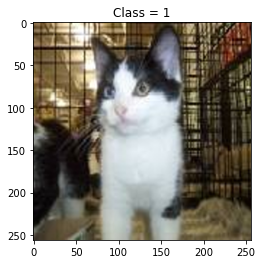

In [34]:
# show one of the images of class 1
index = len(cat_img) + 3
_, ax = plt.subplots()
ax.imshow(np.uint8(all_img[index]))
plt.title("Class = " + str(np.squeeze(img_labels[index])))
plt.show()

In [35]:
from sklearn.model_selection import train_test_split

X_train_0, X_test_0, y_train, y_test = train_test_split(
    all_img[:], img_labels[:], test_size=0.20)

#converting X_train_0 and X_test_0 to numpy array (currently they are list)
X_train_0 = np.asarray(X_train_0)
y_train = np.asarray(y_train)
X_test_0 = np.asarray(X_test_0)
y_test = np.asarray(y_test)

print("X_train_0 shape:" + str(X_train_0.shape))
print("y_train shape:" + str(y_train.shape))
print("X_test_0 shape:" + str(X_test_0.shape))
print("y_test shape:" + str(y_test.shape))

X_train_0 shape:(800, 256, 256, 3)
y_train shape:(800,)
X_test_0 shape:(200, 256, 256, 3)
y_test shape:(200,)


In [36]:
import tf_utils as utils

X_train = X_train_0/255.
Y_train = utils.convert_to_one_hot(np.uint(y_train), 2).T
X_test = X_test_0/255.
Y_test = utils.convert_to_one_hot(np.uint(y_test), 2).T 

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 800
number of test examples = 200
X_train shape: (800, 256, 256, 3)
Y_train shape: (800, 2)
X_test shape: (200, 256, 256, 3)
Y_test shape: (200, 2)


2.3.0
Cost after epoch 0: 0.979761
Cost after epoch 5: 0.748994
Cost after epoch 10: 0.645945
Cost after epoch 15: 0.582467
Cost after epoch 20: 0.542816
Cost after epoch 25: 0.508441
Cost after epoch 30: 0.475380
Cost after epoch 35: 0.478665
Cost after epoch 40: 0.451379
Cost after epoch 45: 0.436659
Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.80625
Test Accuracy: 0.655


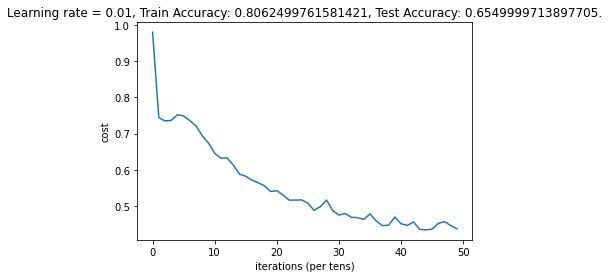

In [37]:
print(tf.__version__)

tf.compat.v1.disable_eager_execution()

parameters, save_path = cnn.run_model(
    X_train, Y_train, X_test, Y_test,
    learning_rate=0.01, num_epochs=50, minibatch_size=64,
    print_cost=True)

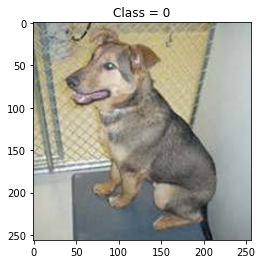

INFO:tensorflow:Restoring parameters from saves\my-model
Labels: [1 0 0 0 1]
Prediction: [1 0 0 0 1]
INFO:tensorflow:Restoring parameters from saves\my-model
Accuracy: 0.655


In [38]:
s_idx = 5
e_idx = 10
X = X_test[s_idx:e_idx]
_, ax = plt.subplots()
ax.imshow(np.uint8(all_img[s_idx]))
plt.title("Class = " + str(np.squeeze(img_labels[s_idx])))
plt.show()

prediction = cnn.predict(X, parameters, save_path)
print("Labels:", y_test[s_idx:e_idx])
print("Prediction:", prediction)

prediction = cnn.predict(X_test, parameters, save_path)
accuracy = np.sum(prediction == y_test)/len(prediction)
print("Accuracy:", accuracy)